In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Using TensorFlow backend.


In [3]:
path = "Images"
annot = "Airplanes_Annotations"

airplane_060.jpg


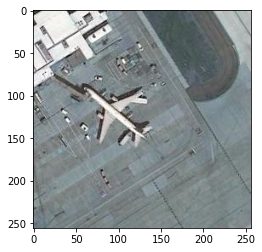

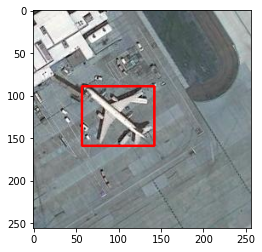

In [4]:
for e,i in enumerate(os.listdir(annot)):
    if e < 10:
        filename = i.split(".")[0]+".jpg"
        print(filename)
        img = cv2.imread(os.path.join(path,filename))
        df = pd.read_csv(os.path.join(annot,i))
        plt.imshow(img)
        for row in df.iterrows():
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        break

In [5]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

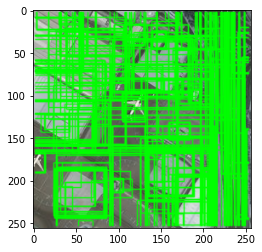

In [6]:
im = cv2.imread(os.path.join(path,"42850.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)

In [7]:
train_images=[]
train_labels=[]

In [8]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [9]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [10]:
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 airplane_060.jpg
1 airplane_029.jpg
2 airplane_177.jpg
3 airplane_089.jpg
4 airplane_121.jpg
inside
5 airplane_009.jpg
6 airplane_067.jpg
7 airplane_189.jpg
8 airplane_058.jpg
9 airplane_098.jpg
11 airplane_086.jpg
12 airplane_061.jpg
13 airplane_045.jpg
inside
15 airplane_006.jpg
17 airplane_037.jpg
18 airplane_190.jpg
inside
19 airplane_028.jpg
20 airplane_123.jpg
inside
21 airplane_049.jpg
22 airplane_051.jpg
23 airplane_130.jpg
24 airplane_017.jpg
25 airplane_105.jpg
26 airplane_195.jpg
27 airplane_194.jpg
29 airplane_030.jpg
30 airplane_149.jpg
31 airplane_092.jpg
34 airplane_104.jpg
35 airplane_034.jpg
36 airplane_032.jpg
39 airplane_170.jpg
40 airplane_134.jpg
41 airplane_047.jpg
42 airplane_181.jpg
43 airplane_088.jpg
45 airplane_019.jpg
46 airplane_070.jpg
48 airplane_175.jpg
50 airplane_168.jpg
51 airplane_068.jpg
52 airplane_043.jpg
53 airplane_012.jpg
inside
54 airplane_099.jpg
55 airplane_116.jpg
56 airplane_087.jpg
57 airplane_159.jpg
58 airplane_167.jpg
59 airplane_139

In [11]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [12]:
X_new.shape

(8909, 224, 224, 3)

In [13]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [14]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [16]:
X= vggmodel.layers[-2].output

In [17]:
predictions = Dense(2, activation="softmax")(X)

In [18]:
model_final = Model(vggmodel.input, predictions)

In [19]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

In [20]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [21]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [23]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [24]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [25]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [26]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8018, 224, 224, 3) (891, 224, 224, 3) (8018, 2) (891, 2)


In [27]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=1)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=1)
testdata = tsdata.flow(x=X_test, y=y_test)

In [28]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [29]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=1, mode='auto')

In [30]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 20, validation_data= testdata, validation_steps=2)

Epoch 1/20
10/10 [==============================] - 17s 2s/step - loss: 0.9389 - accuracy: 0.7844 - val_loss: 0.3881 - val_accuracy: 0.9219
Epoch 2/20
10/10 [==============================] - 5s 533ms/step - loss: 0.3102 - accuracy: 0.8813 - val_loss: 0.1329 - val_accuracy: 0.9375
Epoch 3/20
10/10 [==============================] - 5s 531ms/step - loss: 0.2881 - accuracy: 0.8969 - val_loss: 0.3063 - val_accuracy: 0.8594
Epoch 4/20
10/10 [==============================] - 5s 531ms/step - loss: 0.3826 - accuracy: 0.8750 - val_loss: 0.1242 - val_accuracy: 0.9531
Epoch 5/20
10/10 [==============================] - 5s 528ms/step - loss: 0.2326 - accuracy: 0.9187 - val_loss: 0.1563 - val_accuracy: 0.9375
Epoch 6/20
10/10 [==============================] - 5s 531ms/step - loss: 0.1650 - accuracy: 0.9406 - val_loss: 0.0862 - val_accuracy: 0.9531
Epoch 7/20
10/10 [==============================] - 5s 532ms/step - loss: 0.1844 - accuracy: 0.9438 - val_loss: 0.1846 - val_accuracy: 0.8906
Epoch 8/

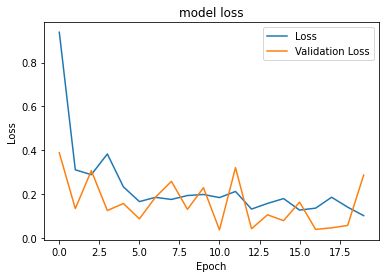

<Figure size 432x288 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

0
이상객체 탐지
1
이상객체 탐지
2
이상객체 탐지
3
이상 없음
4
이상 없음
5
이상 없음
6
이상객체 탐지
7
이상 없음
8
이상 없음
9
이상 없음
10
이상 없음
11
이상객체 탐지
12
이상 없음
13
이상객체 탐지
14
이상객체 탐지
15
이상객체 탐지
16
이상 없음
17
이상 없음
18
이상객체 탐지
19
이상 없음
20
이상 없음
21
이상 없음
22
이상 없음
23
이상객체 탐지
24
이상 없음
25
이상 없음
26
이상 없음
27
이상 없음
28
이상 없음
29
이상객체 탐지
30
이상객체 탐지
31
이상 없음
32
이상 없음
33
이상객체 탐지
34
이상객체 탐지
35
이상 없음
36
이상 없음
37
이상객체 탐지
38
이상 없음
39
이상객체 탐지
40
이상 없음
41
이상객체 탐지
42
이상객체 탐지
43
이상 없음
44
이상객체 탐지
45
이상 없음
46
이상 없음
47
이상 없음
48
이상객체 탐지
49
이상객체 탐지
50
이상 없음
51
이상 없음
52
이상 없음
53
이상 없음
54
이상객체 탐지
55
이상 없음
56
이상 없음
57
이상 없음
58
이상 없음
59
이상 없음
60
이상 없음
61
이상객체 탐지
62
이상 없음
63
이상 없음
64
이상 없음
65
이상 없음
66
이상객체 탐지
67
이상 없음
68
이상 없음
69
이상객체 탐지
70
이상객체 탐지
71
이상객체 탐지
72
이상 없음
73
이상객체 탐지
74
이상 없음
75
이상객체 탐지
76
이상객체 탐지
77
이상 없음
78
이상 없음
79
이상 없음
80
이상 없음
81
이상 없음
82
이상객체 탐지
83
이상 없음
84
이상 없음
85
이상객체 탐지
86
이상객체 탐지
87
이상객체 탐지
88
이상 없음
89
이상 없음
90
이상 없음
91
이상객체 탐지
92
이상객체 탐지
93
이상객체 탐지
94
이상 없음
95
이상객체 탐지
96
이상 없음
97
이상 없음
98
이상 없음
99
이상 없음
100
이상객체 탐지
101
이상객체 탐지
102
이상객체 탐

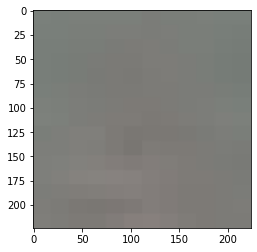

In [39]:
for i in range(len(X_test)):
  im = X_test[i]
  plt.imshow(im)
  img = np.expand_dims(im, axis=0)
  out= model_final.predict(img)
  if out[0][0] > out[0][1]:
    print(i)
    print("이상객체 탐지")
  else:
    print(i)
    print("이상 없음")

이상 객체가 탐지되었습니다. 검출된 이미지 명 : 428452.jpg
이상 객체가 탐지되었습니다. 검출된 이미지 명 : 42847.jpg
이상 객체가 탐지되었습니다. 검출된 이미지 명 : 428482.jpg
이상 객체가 탐지되었습니다. 검출된 이미지 명 : 428451.jpg
이상 객체가 탐지되었습니다. 검출된 이미지 명 : 428481.jpg
이상 객체가 탐지되었습니다. 검출된 이미지 명 : 42850.jpg
이상 객체가 탐지되었습니다. 검출된 이미지 명 : 42848.jpg
이상 객체가 탐지되었습니다. 검출된 이미지 명 : 428492.jpg
이상 객체가 탐지되었습니다. 검출된 이미지 명 : 428491.jpg
이상 객체가 탐지되었습니다. 검출된 이미지 명 : 428501.jpg
이상 객체가 탐지되었습니다. 검출된 이미지 명 : 428503.jpg
이상 객체가 탐지되었습니다. 검출된 이미지 명 : 428462.jpg
이상 객체가 탐지되었습니다. 검출된 이미지 명 : 428472.jpg
이상 객체가 탐지되었습니다. 검출된 이미지 명 : 42845.jpg
이상 객체가 탐지되었습니다. 검출된 이미지 명 : 428461.jpg
이상 객체가 탐지되었습니다. 검출된 이미지 명 : 428483.jpg
이상 객체가 탐지되었습니다. 검출된 이미지 명 : 42849.jpg


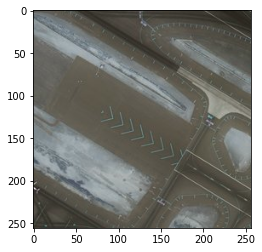

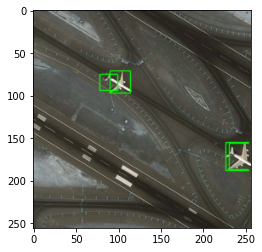

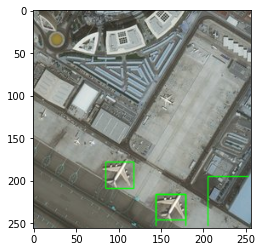

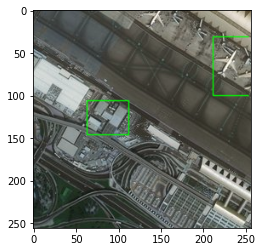

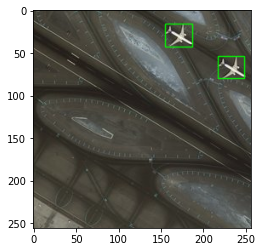

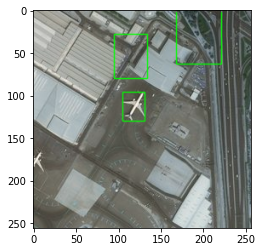

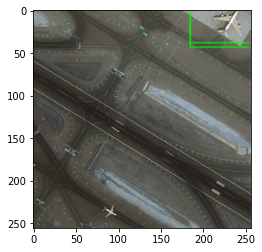

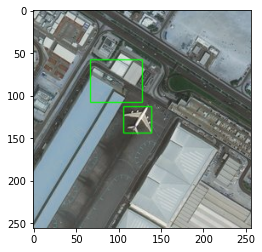

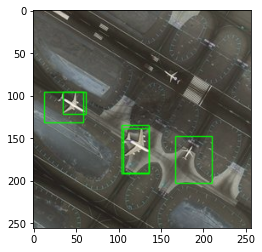

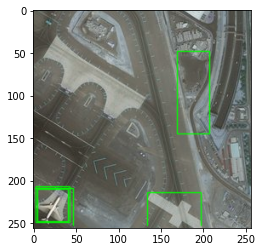

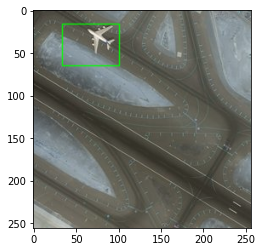

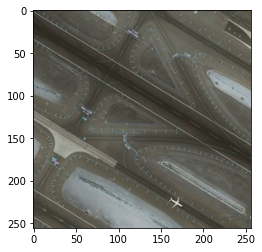

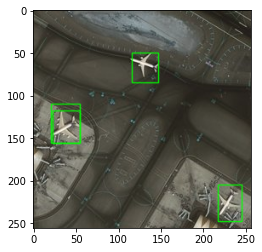

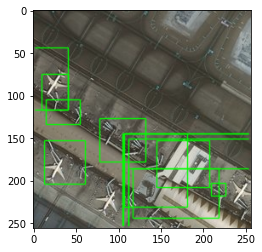

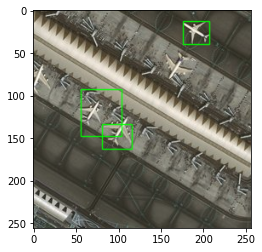

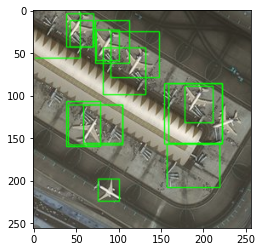

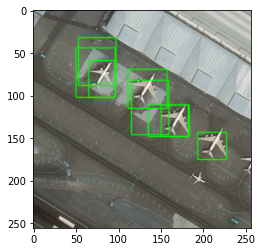

In [43]:
z=0
for e,i in enumerate(os.listdir(path)):
    if i.startswith("4"):
        z += 1
        img = cv2.imread(os.path.join(path,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e,result in enumerate(ssresults):
            if e < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][0] > 0.65:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)
        print("이상 객체가 탐지되었습니다. 검출된 이미지 명 : " + i)